# 1. Apprentissage non-supervisé #

## 1.1. Clustering ##

### K-Means ###

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

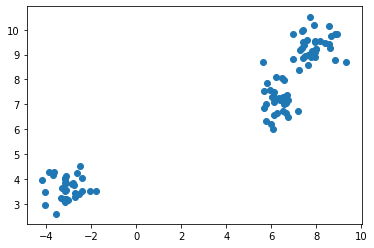

In [2]:
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.5)
plt.scatter(X[:, 0], X[:, 1])

In [3]:
from sklearn.cluster import KMeans

-51.405509612065906

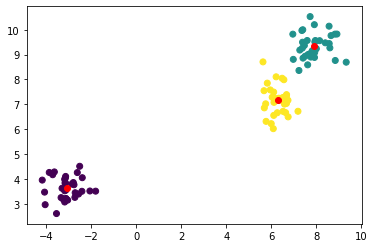

In [4]:
model = KMeans(n_clusters=3)
model.fit(X)
model.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='r')

model.inertia_
model.score(X)

### Elbow Method ###

In [5]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

Text(0, 0.5, 'Coût du modèle (inertia)')

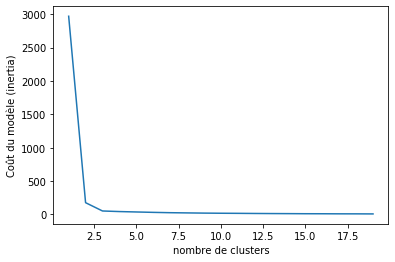

In [6]:
plt.plot(K_range, inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("Coût du modèle (inertia)")

Pour de meilleurs résultats sur clusters non-convexes et anisotropes : Agglomerative Clustering et DBSCAN

## 1.2. Détection d'anomalies ##

### Isolation Forest ###

In [7]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.5)
X[-1, :] = np.array([2.25, 5])

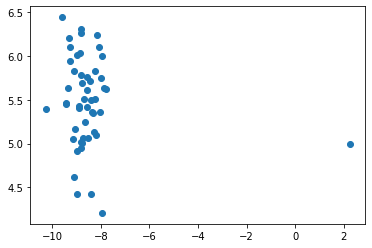

In [8]:
plt.scatter(X[:, 0], X[:, 1])

In [9]:
from sklearn.ensemble import IsolationForest

In [10]:
model = IsolationForest(contamination=0.01)
model.fit(X)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

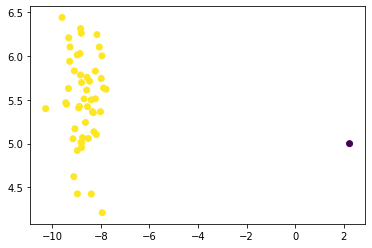

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=model.predict(X))

### Application Digits ###

In [12]:
from sklearn.datasets import load_digits

In [13]:
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

print(X.shape)

(1797, 64)


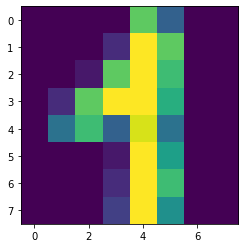

In [14]:
plt.imshow(images[42])

In [15]:
model = IsolationForest(random_state=0, contamination=0.02)

In [16]:
model.fit(X)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.02,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=0, verbose=0, warm_start=False)

In [17]:
model.predict(X)
# normale = +1, anomalie = -1

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
outliers = (model.predict(X) == -1)

In [19]:
outliers

array([False, False, False, ..., False, False, False])

Text(0.5, 1.0, '2')

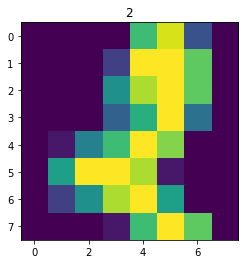

In [20]:
plt.imshow(images[outliers][0])
plt.title(y[outliers][0])

## 1.3. Réduction de la dimensionnalité (ACP) ##

### Visualisation de données ###

In [21]:
from sklearn.decomposition import PCA

In [22]:
X.shape

(1797, 64)

In [23]:
model = PCA(n_components=2)
X_reduced = model.fit_transform(X)

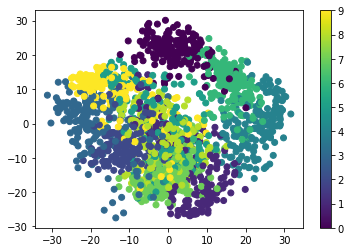

In [24]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.colorbar()

In [25]:
model.components_.shape

(2, 64)

### Compression de données ###

In [26]:
model = PCA(n_components=64)
X_reduced = model.fit_transform(X)

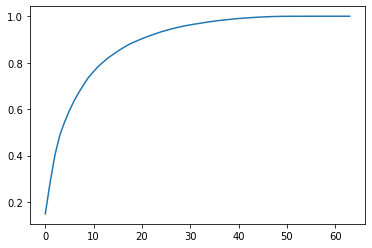

In [27]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [28]:
np.argmax(np.cumsum(model.explained_variance_ratio_) > 0.99)

40

In [29]:
X_recovered = model.inverse_transform(X_reduced)

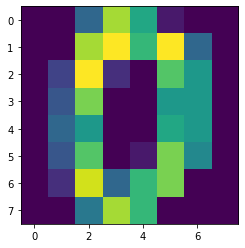

In [30]:
plt.imshow(X_recovered[0].reshape((8, 8)))

In [31]:
model = PCA(n_components=0.95)
X_reduced = model.fit_transform(X)
model.n_components_

29

# 2. Ensemble Learning #

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

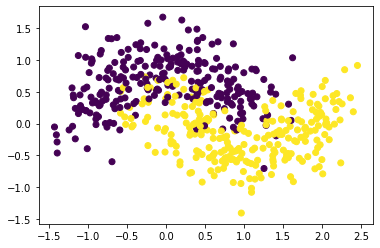

In [33]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Voting Classifier ###

In [38]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier

In [42]:
model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)

model_4 = VotingClassifier([("SGD", model_1),
                            ("Tree", model_2), 
                            ("KNN", model_3)],
                           voting="hard")

for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

SGDClassifier 0.84
DecisionTreeClassifier 0.86
KNeighborsClassifier 0.86
VotingClassifier 0.8733333333333333


### Bagging ###

In [43]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [45]:
model = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                         n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8866666666666667

In [46]:
model = RandomForestClassifier(n_estimators=100, max_depth=)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8666666666666667

### Boosting ###

In [47]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [48]:
model = AdaBoostClassifier(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.88

### Stacking ###

In [49]:
from sklearn.ensemble import StackingClassifier

In [52]:
model_4 = StackingClassifier([("SGD", model_1),
                            ("Tree", model_2), 
                            ("KNN", model_3)],
                           final_estimator=KNeighborsClassifier())

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.88